# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
#!pip install citipy
#can comment this out once you've run it once

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude


from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
#weatherapi = weather_api_key
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"


In [12]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # your code below
        #referencing 06-02-03
        city_url = base_url + "&q=" + city
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
     
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto deseado
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | paragominas
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | winnemucca
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | viedma
Processing Record 11 of Set 1 | anabar
City not found. Skipping...
Processing Record 12 of Set 1 | kota tinggi
Processing Record 13 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 14 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 15 of Set 1 | tianfu
Processing Record 16 of Set 1 | gadzhiyevo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | valparaiso
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
#reference 06-02-05 for this section
#your code here
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto deseado,-47.7503,-65.8938,56.97,57,23,15.14,AR,1707346666
1,bredasdorp,-34.5322,20.0403,65.37,78,5,8.93,ZA,1707346908
2,hawaiian paradise park,19.5933,-154.9731,76.03,86,75,10.36,US,1707346908
3,waitangi,-43.9535,-176.5597,66.81,89,70,5.28,NZ,1707346909
4,paragominas,-2.9667,-47.4833,73.83,97,84,2.89,BR,1707346909


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto deseado,-47.7503,-65.8938,56.97,57,23,15.14,AR,1707346666
1,bredasdorp,-34.5322,20.0403,65.37,78,5,8.93,ZA,1707346908
2,hawaiian paradise park,19.5933,-154.9731,76.03,86,75,10.36,US,1707346908
3,waitangi,-43.9535,-176.5597,66.81,89,70,5.28,NZ,1707346909
4,paragominas,-2.9667,-47.4833,73.83,97,84,2.89,BR,1707346909


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

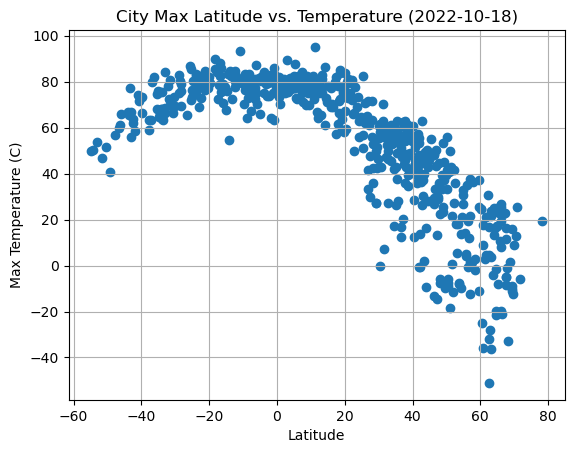

In [25]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
#referencing 06-02-05

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# more of my code, double check this with tutor
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid(True)
#figure out how to get the bubble dots

# Save the figure
plt.savefig("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

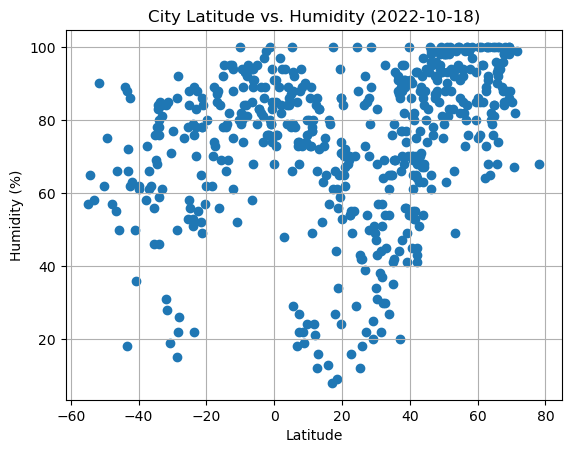

In [26]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# more of my code, double check this with tutor
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid(True)
#figure out how to get the bubble dots

# Save the figure
plt.savefig("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

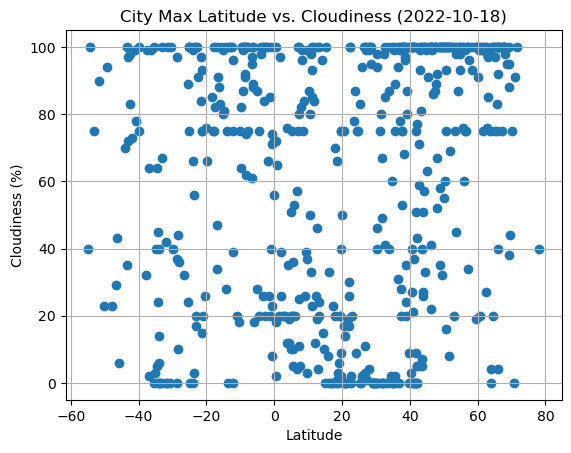

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# more of my code, double check this with tutor
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid(True)
#figure out how to get the bubble dots

# Save the figure
plt.savefig("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

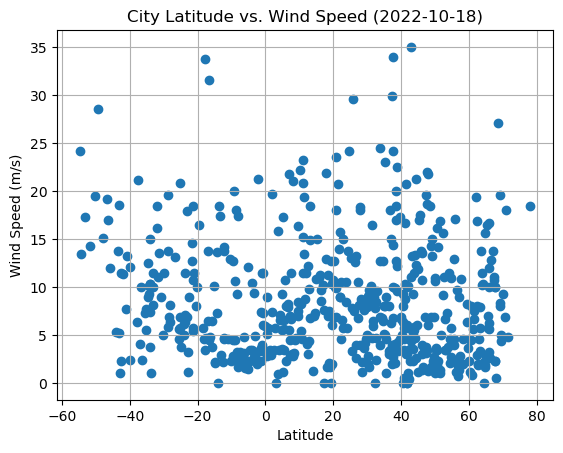

In [28]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# more of my code, double check this with tutor
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid(True)
#figure out how to get the bubble dots


# Save the figure
plt.savefig("C:/Users/secar/OneDrive/Documents/Bootcamp/New folder (2)/Starter_Code/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


IndexError: tuple index out of range

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
#if running this doesn't work check the filtered dfs from module 5

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hawaiian paradise park,19.5933,-154.9731,76.03,86,75,10.36,US,1707346908
5,ribeira grande,38.5167,-28.7000,58.77,91,97,20.00,PT,1707346624
6,winnemucca,40.9730,-117.7357,39.25,70,100,5.75,US,1707346740
7,tiksi,71.6872,128.8694,-6.03,99,100,4.83,RU,1707346910
10,kota tinggi,1.7381,103.8999,78.84,97,97,2.89,MY,1707346911


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto deseado,-47.7503,-65.8938,56.97,57,23,15.14,AR,1707346666
1,bredasdorp,-34.5322,20.0403,65.37,78,5,8.93,ZA,1707346908
3,waitangi,-43.9535,-176.5597,66.81,89,70,5.28,NZ,1707346909
4,paragominas,-2.9667,-47.4833,73.83,97,84,2.89,BR,1707346909
8,edinburgh of the seven seas,-37.0676,-12.3116,63.30,66,64,4.09,SH,1707346910


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7153242980970382


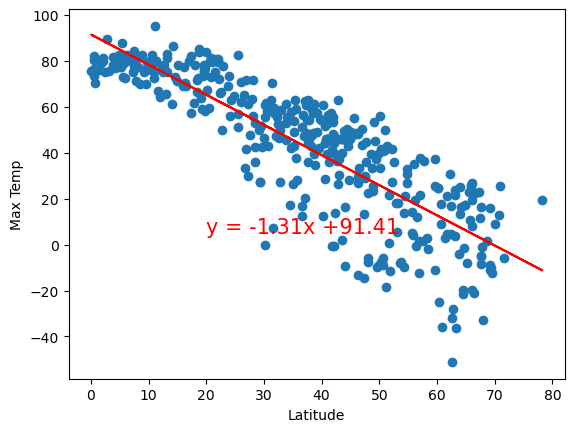

In [41]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#from 06-02-07
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#make sure you get this right then copy down to the others


The r-value is: 0.37192251448586783


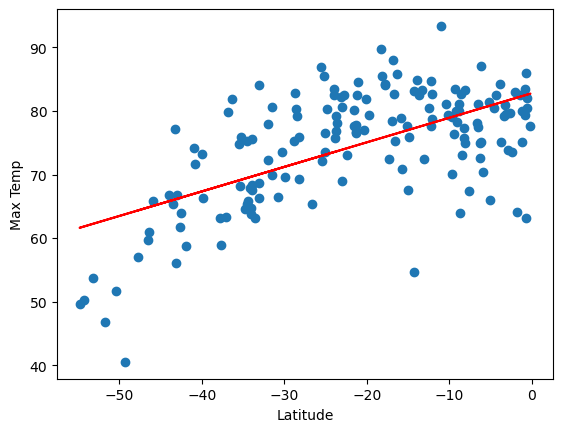

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002378997490059189


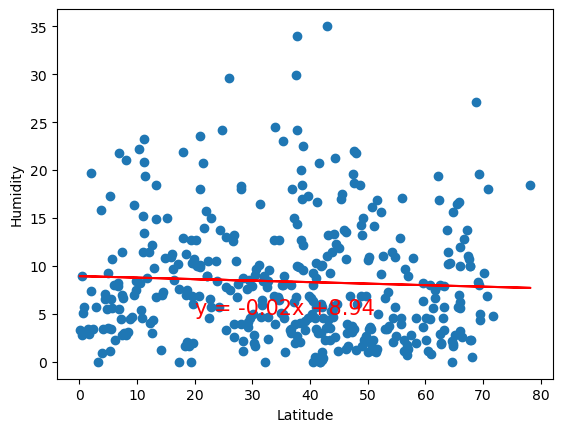

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

The r-value is: 0.12703929711258716


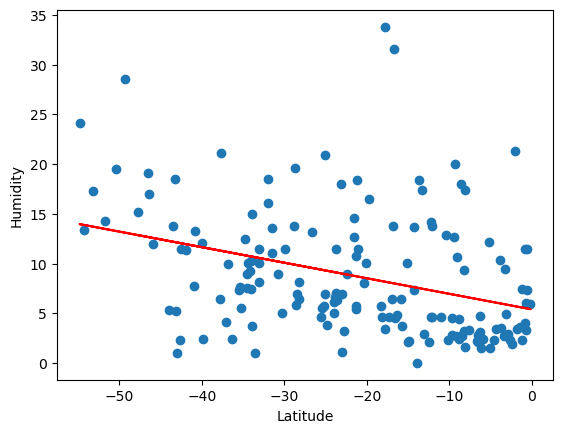

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Humidity is slightly lower closer to the equator in the southern hemisphere. The most clear correlation is between temperature and Latitude.